<a href="https://colab.research.google.com/github/anuj-glitch/employee-attrition-rate/blob/master/chrun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
#Importing packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error

In [99]:
#Exploring the dataset

train_df = pd.read_csv('/content/Train.csv')   #(7000, 24) 
target = train_df['Attrition_rate']
train_df.drop(['Attrition_rate'],1,inplace=True)
test_df = pd.read_csv('/content/Test.csv')     #(3000, 23)

dataset = pd.concat([train_df, test_df], axis=0, sort=False)

print(dataset.shape)
dataset.head()

(10000, 23)


,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2


In [100]:
dataset.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          573
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              196
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                     12
Compensation_and_Benefits      0
Work_Life_balance             16
VAR1                           0
VAR2                         794
VAR3                           0
VAR4                         954
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [101]:
#handling missing values in the dataset
dataset['Time_of_service'].fillna(dataset['Time_of_service'].median(),inplace=True)
dataset['Time_of_service'].median()

10.0

In [102]:
dataset['Age'].ffill(inplace=True)
#dataset['Age'].mean()

In [103]:
dataset['Pay_Scale'] = dataset.groupby('Post_Level')['Pay_Scale'].transform(lambda x: x.fillna(x.mean()))
dataset['Pay_Scale'].mean()

6.022635900792347

In [104]:
dataset['VAR2'] = dataset['VAR2'].fillna(dataset['VAR2'].mode()[0])
print(dataset['VAR2'].mode()[0])

dataset['VAR4'] = dataset['VAR4'].fillna(dataset['VAR4'].mode()[0])
print(dataset['VAR4'].mode()[0])

dataset['Work_Life_balance'] = dataset['Work_Life_balance'].fillna(dataset['Work_Life_balance'].mode()[0])
print(dataset['Work_Life_balance'].mode()[0])

0.7516
2.0
1.0


In [105]:
dataset['Gender']=dataset['Gender'].apply(lambda x : 0 if x=='F' else 1)

dataset['Relationship_Status']=dataset['Relationship_Status'].apply(lambda x : 0 if x=='Married' else 1)

In [106]:
#handling categorical features in the dataset
categorical_data=dataset.select_dtypes(include=['object'])

label_X_train = dataset.copy()
label_encoder = LabelEncoder()
label_X_train['Decision_skill_possess'] = label_encoder.fit_transform(label_X_train['Decision_skill_possess'])

one_hot_enc = OneHotEncoder(handle_unknown='ignore')
enc_data = one_hot_enc.fit_transform(label_X_train[['Decision_skill_possess']]).toarray()
col = dataset['Decision_skill_possess'].unique()
enc_skill_train = pd.DataFrame(enc_data,columns=col)
print(one_hot_enc.categories_[0])
dataset = dataset.join(enc_skill_train)

label_X_train = dataset.copy()
label_encoder = LabelEncoder()
label_X_train['Unit'] = label_encoder.fit_transform(label_X_train['Unit'])

one_hot_enc = OneHotEncoder(handle_unknown='ignore')
enc_data = one_hot_enc.fit_transform(label_X_train[['Unit']]).toarray()
col = dataset['Unit'].unique()
enc_Unit_train = pd.DataFrame(enc_data,columns=col)
dataset = dataset.join(enc_Unit_train)


label_enc=LabelEncoder()
dataset['Compensation_and_Benefits']=label_enc.fit_transform(dataset['Compensation_and_Benefits'])


dataset.drop(['Hometown','Decision_skill_possess','Unit','Employee_ID'],axis=1,inplace=True)
dataset.head(10)

[0 1 2 3]


,Gender,Age,Education_Level,Relationship_Status,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Conceptual,Analytical,Behavioral,Directive,IT,R&D,Logistics,Quality,Sales,Human Resource Management,Marketing,Purchasing,Production,Operarions,Accounting and Finance,Security
0,0,42.0,4,0,4.0,4,33,1,1,7.0,2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0,32.0,5,1,7.0,4,30,1,5,4.0,2,1.0,3,-0.9612,-0.4537,2.0,1,8,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,24.0,3,1,5.0,4,36,0,3,6.0,2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,65.0,2,1,41.0,2,72,1,1,1.0,2,1.0,4,-0.9612,0.7075,1.0,2,8,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,58.0,3,0,27.0,3,51,0,2,8.0,2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,52.0,3,0,21.0,3,25,0,1,8.0,3,1.0,4,-0.1048,0.7075,2.0,1,9,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,26.0,3,1,4.0,3,56,1,3,8.0,2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,50.0,5,1,11.0,4,28,1,1,2.0,0,4.0,3,-0.1048,0.7075,2.0,2,8,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,31.0,1,0,5.0,4,62,1,3,2.0,3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,44.0,3,0,12.0,4,47,1,3,2.0,2,4.0,4,1.6081,0.7075,2.0,2,7,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


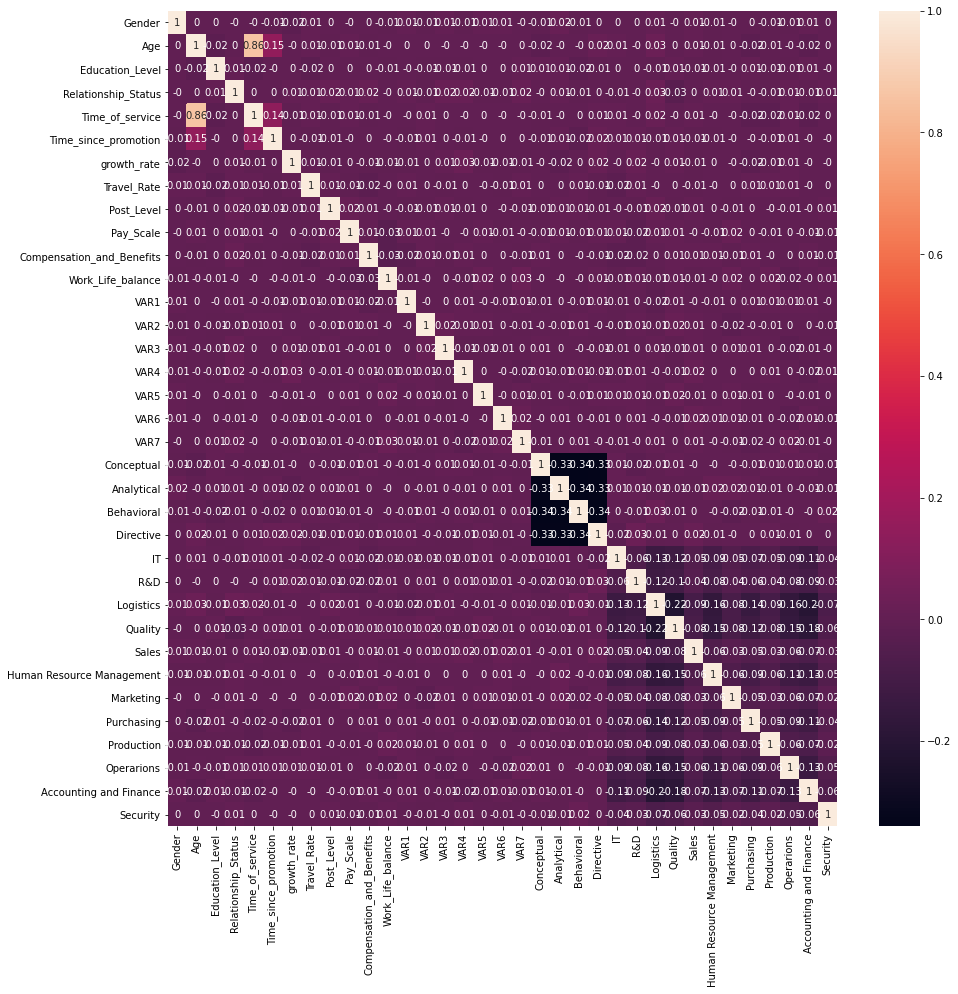

In [107]:
#Let's plot correlation map
corr_dataset2 = dataset.corr().round(2)

plt.figure(figsize=(15,15))
sns.heatmap(corr_dataset2,annot=True)

In [108]:
#Scaling and normalization 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

feature_set=ss.fit_transform(dataset)
dataset

,Gender,Age,Education_Level,Relationship_Status,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Conceptual,Analytical,Behavioral,Directive,IT,R&D,Logistics,Quality,Sales,Human Resource Management,Marketing,Purchasing,Production,Operarions,Accounting and Finance,Security
0,0,42.0,4,0,4.0,4,33,1,1,7.0,2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0,32.0,5,1,7.0,4,30,1,5,4.0,2,1.0,3,-0.9612,-0.4537,2.0,1,8,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,24.0,3,1,5.0,4,36,0,3,6.0,2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,65.0,2,1,41.0,2,72,1,1,1.0,2,1.0,4,-0.9612,0.7075,1.0,2,8,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,58.0,3,0,27.0,3,51,0,2,8.0,2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,23.0,5,0,4.0,1,20,1,2,6.0,3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6996,0,44.0,1,0,16.0,2,59,0,2,4.0,3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6997,0,49.0,3,1,10.0,1,59,1,2,3.0,2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6998,0,47.0,3,0,24.0,1,21,1,5,8.0,0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [109]:
#Spliting the dataset into training and testing sets 
df_train = (feature_set[:7000])   #Used for training the model
df_test = (feature_set[7000:])    #Used as a final file for prediction

features=df_train

#Split input and output into desired splits of train and validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.1,random_state=42)

In [110]:
from sklearn import model_selection, metrics    
from sklearn.linear_model import Lasso 

lasso = Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=3213,
      selection='cyclic', tol=0.0001, warm_start=False)

#fitting the lasso model
lasso.fit(X_train,y_train)

#Making the predictions 
df_train_predictions = lasso.predict(X_test)

df_train_predictions[:10]
print("RMSE:",(np.sqrt(metrics.mean_squared_error(y_test, df_train_predictions))))
print("Score:",(100*max(0,1-np.sqrt(metrics.mean_squared_error(y_test,df_train_predictions)))))
print(metrics.r2_score(y_test,df_train_predictions))

RMSE: 0.1986366825979
Score: 80.13633174021
-0.00033290638924676763


In [111]:
from xgboost.sklearn import XGBRegressor                   # Importing the XGBoost Regressor
from sklearn.model_selection import GridSearchCV           # Importing Grid Search

# param_grid is a dictionary containing different parameters for XGBoost
xgb = XGBRegressor()

param_grid = {"max_depth": [3,5,10,15],
              "n_estimators": [50,100,200,300] , 
              "gamma": [0.1, 0.2, 0,3], 
              "learning_rate": [0.08],
              "min_child_weight": [5], 
              "colsample_bytree": [0.8], 
              "subsample": [0.85]}

# Performing Grid Search on xgb regressor and param_grid parameters
grid_search = GridSearchCV(xgb, 
                           param_grid=param_grid,
                           cv = 2,
                           n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           verbose=2)

#fitting the model
grid_search.fit(X_train,y_train)

y_pred_gridsearch = grid_search.predict(X_test)

print("RMSE:",(np.sqrt(metrics.mean_squared_error(y_test, y_pred_gridsearch))))
print("Score:",(100*max(0,1-np.sqrt(metrics.mean_squared_error(y_test,y_pred_gridsearch)))))
print(metrics.r2_score(y_test,y_pred_gridsearch))

Fitting 2 folds for each of 64 candidates, totalling 128 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:  2.6min finished


[05:23:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.1986338594430877
Score: 80.13661405569124
-0.00030447181661230616


In [112]:
# Use model to make predictions 
result = grid_search.predict(df_test)      
print(result)

#submmision file
submission = pd.DataFrame({ 'Employee_ID': (test_df['Employee_ID']), 'Attrition_rate':  result })
submission.to_csv('submission22.csv', index=False)

submission.head(10)

[0.18917197 0.18917197 0.18917197 ... 0.18917197 0.18917197 0.18917197]


,Employee_ID,Attrition_rate
0,EID_22713,0.189172
1,EID_9658,0.189172
2,EID_22203,0.189172
3,EID_7652,0.189172
4,EID_6516,0.189172
5,EID_20283,0.189172
6,EID_21014,0.189172
7,EID_7693,0.189172
8,EID_13232,0.189172
9,EID_6515,0.189172
